In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Gradient Tape

- tf.GradientTape() is used for storing the procedual of computational graph. It will be used for calculating backward propagation automatically.

- Gradients have the results of partial derivatvies of t3 on t1, and t2. (${dt3 \over dt1}$, ${dt3 \over dt2}$)

In [4]:
t1 = tf.Variable([1, 2, 3], dtype=tf.float32)
t2 = tf.Variable([10, 20, 30], dtype=tf.float32)

with tf.GradientTape() as tape:
    t3 = t1 * t2
    
gradients = tape.gradient(t3, [t1, t2])
print(type(gradients))

print('dt1: ', gradients[0])
print('dt2: ', gradients[1])

<class 'list'>
dt1:  tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
dt2:  tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


- Gradients do not need to care about the constant

In [5]:
t4 = tf.constant([1, 2, 3], dtype=tf.float32)
t5 = tf.Variable([10, 20, 30], dtype=tf.float32)

with tf.GradientTape() as tape:
    t6 = t4 * t5
    
gradients = tape.gradient(t6, [t4, t5])
print(type(gradients))

print('dt4: ', gradients[0])
print('dt5: ', gradients[1])

<class 'list'>
dt4:  None
dt5:  tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


# Simple linear regression

In [6]:
# data
x_data = tf.random.normal(shape = (1000, ), dtype = tf.float32)
y_data = 3*x_data + 1

# variables
w = tf.Variable(-1, dtype=tf.float32)
b = tf.Variable(-1, dtype=tf.float32)

LR = 0.01
EPOCHS = 10
w_trace, b_trace = [], []

for epoch in range(EPOCHS):
    for x, y in zip(x_data, y_data): # pair
        with tf.GradientTape() as tape:
            prediction = w*x + b # model
            loss = (prediction - y)**2
            
        gradients = tape.gradient(loss, [w, b])
        
        w_trace.append(w.numpy()) # store prior value
        b_trace.append(b.numpy())
        w = tf.Variable(w - LR * gradients[0]) # update by gradient descent
        b = tf.Variable(b - LR * gradients[1])

<bound method _AxesBase.grid of <AxesSubplot:>>

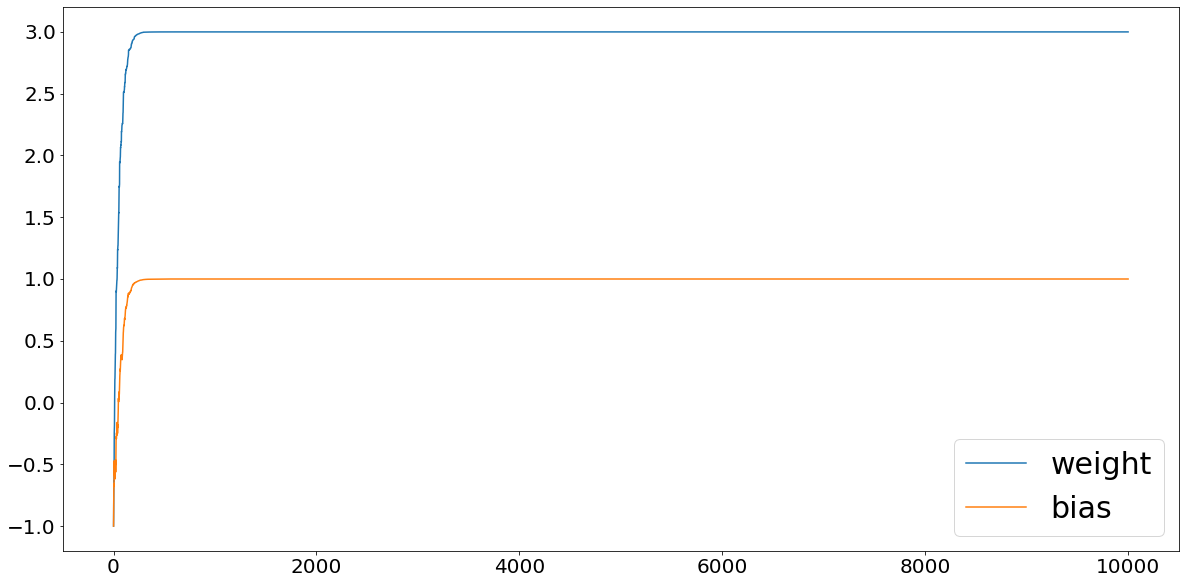

In [11]:
fig, ax = plt.subplots(figsize = (20, 10))

ax.plot(w_trace, label = 'weight') # graph 1
ax.plot(b_trace, label = 'bias') # grph 2

ax.tick_params(labelsize = 20)
ax.legend(fontsize = 30)
ax.grid